In [1]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', '..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

Quick check that working directory and train basin file exists:

In [3]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("warm springs"))

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all
Train Basin File Exists: True


check that daily no phyiscs still runs correctly:

In [33]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
params = {
    "epochs":5,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#defaults to daily so no need to specify hourly
lstmNoPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [35]:
lstmNoPhysicsDaily.train()

2025-01-10 19:28:20,526: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192820\output.log initialized.
2025-01-10 19:28:20,529: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192820
2025-01-10 19:28:20,533: ### Run configurations for testing_run
2025-01-10 19:28:20,535: experiment_name: testing_run
2025-01-10 19:28:20,536: train_basin_file: warm springs
2025-01-10 19:28:20,539: validation_basin_file: warm springs
2025-01-10 19:28:20,541: test_basin_file: warm springs
2025-01-10 19:28:20,544: train_start_date: 1994-10-01 00:00:00
2025-01-10 19:28:20,546: train_end_date: 2002-09-30 00:00:00
2025-01-10 19:28:20,549: validation_start_date: 2002-10-01 00:00:00
2025-01-10 19:28:20,550: validation_end_date: 2005-09-30 00:00:00
2025-01-10 19:28:20,551: test_start_date: 2005-10-01 00:00:00
2025-01-10 19:28:20,553: test_end_date: 2009-09-30 00:00:00
2025-01-10 19:28:20,554: device: cpu
2025

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]
2025-01-10 19:28:28,797: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192820\validation\model_epoch005\validation_metrics.csv
2025-01-10 19:28:28,799: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192820\validation\model_epoch005\validation_results.p


Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

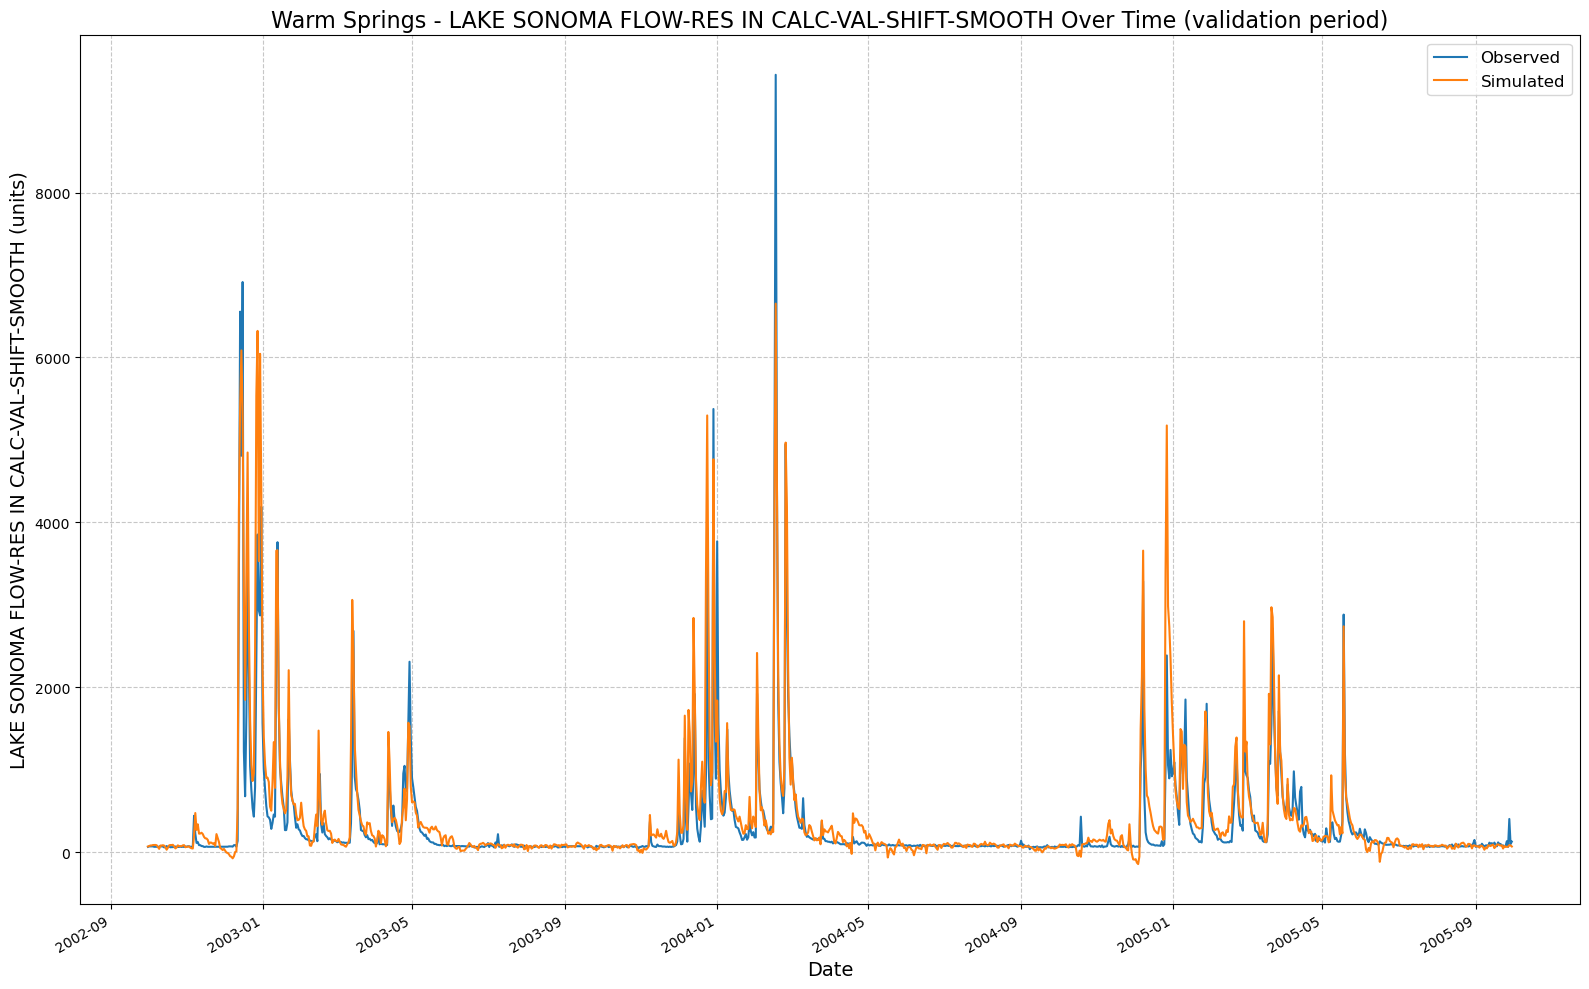

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192820\results_output_validation.csv


{'NSE': 0.7508632987737656,
 'MSE': 122150.1328125,
 'RMSE': 349.4998323497452,
 'KGE': 0.701383877655535,
 'Alpha-NSE': 1.147679070381665,
 'Beta-KGE': 1.2421090602874756,
 'Beta-NSE': 0.11255862523736657,
 'Pearson-r': 0.9064816401877831,
 'FHV': 12.560151517391205,
 'FMS': 7.016808407694438,
 'FLV': -2498.1608981410227,
 'Peak-Timing': 0.4,
 'Peak-MAPE': 20.53187131881714}

In [37]:
lstmNoPhysicsDaily.results()

check if no physics hourly works:

In [9]:
# set path to folder, ensure that daily.csv and hourly.csv are present
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
params = {
    "epochs":5,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
#if using hourly data , set hourly = True
lstmNoPhysicsHourly = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=True)

In [10]:
lstmNoPhysicsHourly.train()

2025-01-10 19:00:09,289: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_190009\output.log initialized.
2025-01-10 19:00:09,290: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_190009
2025-01-10 19:00:09,291: ### Run configurations for testing_run
2025-01-10 19:00:09,293: experiment_name: testing_run
2025-01-10 19:00:09,295: train_basin_file: warm springs
2025-01-10 19:00:09,296: validation_basin_file: warm springs
2025-01-10 19:00:09,298: test_basin_file: warm springs
2025-01-10 19:00:09,299: train_start_date: 1994-10-01 00:00:00
2025-01-10 19:00:09,300: train_end_date: 2002-09-30 00:00:00
2025-01-10 19:00:09,302: validation_start_date: 2002-10-01 00:00:00
2025-01-10 19:00:09,303: validation_end_date: 2005-09-30 00:00:00
2025-01-10 19:00:09,304: test_start_date: 2005-10-01 00:00:00
2025-01-10 19:00:09,305: test_end_date: 2009-09-30 00:00:00
2025-01-10 19:00:09,306: device: cpu
2025

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Validation: 100%|██████████| 1/1 [00:13<00:00, 13.65s/it]
2025-01-10 19:14:45,441: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_190009\validation\model_epoch005\validation_metrics.csv
2025-01-10 19:14:45,451: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_190009\validation\model_epoch005\validation_results.p


In [11]:
lstmNoPhysicsHourly.results()

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


KeyError: '1D'

check if physics daily still works:

In [39]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/WarmSprings_Inflow_daily.csv")
params = {
    "epochs":5,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
lstmPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False)

In [41]:
lstmPhysicsDaily.train()

2025-01-10 19:28:58,836: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192858\output.log initialized.
2025-01-10 19:28:58,838: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192858
2025-01-10 19:28:58,841: ### Run configurations for testing_run
2025-01-10 19:28:58,843: experiment_name: testing_run
2025-01-10 19:28:58,845: train_basin_file: warm springs
2025-01-10 19:28:58,849: validation_basin_file: warm springs
2025-01-10 19:28:58,852: test_basin_file: warm springs
2025-01-10 19:28:58,854: train_start_date: 1994-10-01 00:00:00
2025-01-10 19:28:58,856: train_end_date: 2002-09-30 00:00:00
2025-01-10 19:28:58,859: validation_start_date: 2002-10-01 00:00:00
2025-01-10 19:28:58,860: validation_end_date: 2005-09-30 00:00:00
2025-01-10 19:28:58,862: test_start_date: 2005-10-01 00:00:00
2025-01-10 19:28:58,863: test_end_date: 2009-09-30 00:00:00
2025-01-10 19:28:58,864: device: cpu
2025

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]
2025-01-10 19:29:07,681: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192858\validation\model_epoch005\validation_metrics.csv
2025-01-10 19:29:07,685: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192858\validation\model_epoch005\validation_results.p


Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

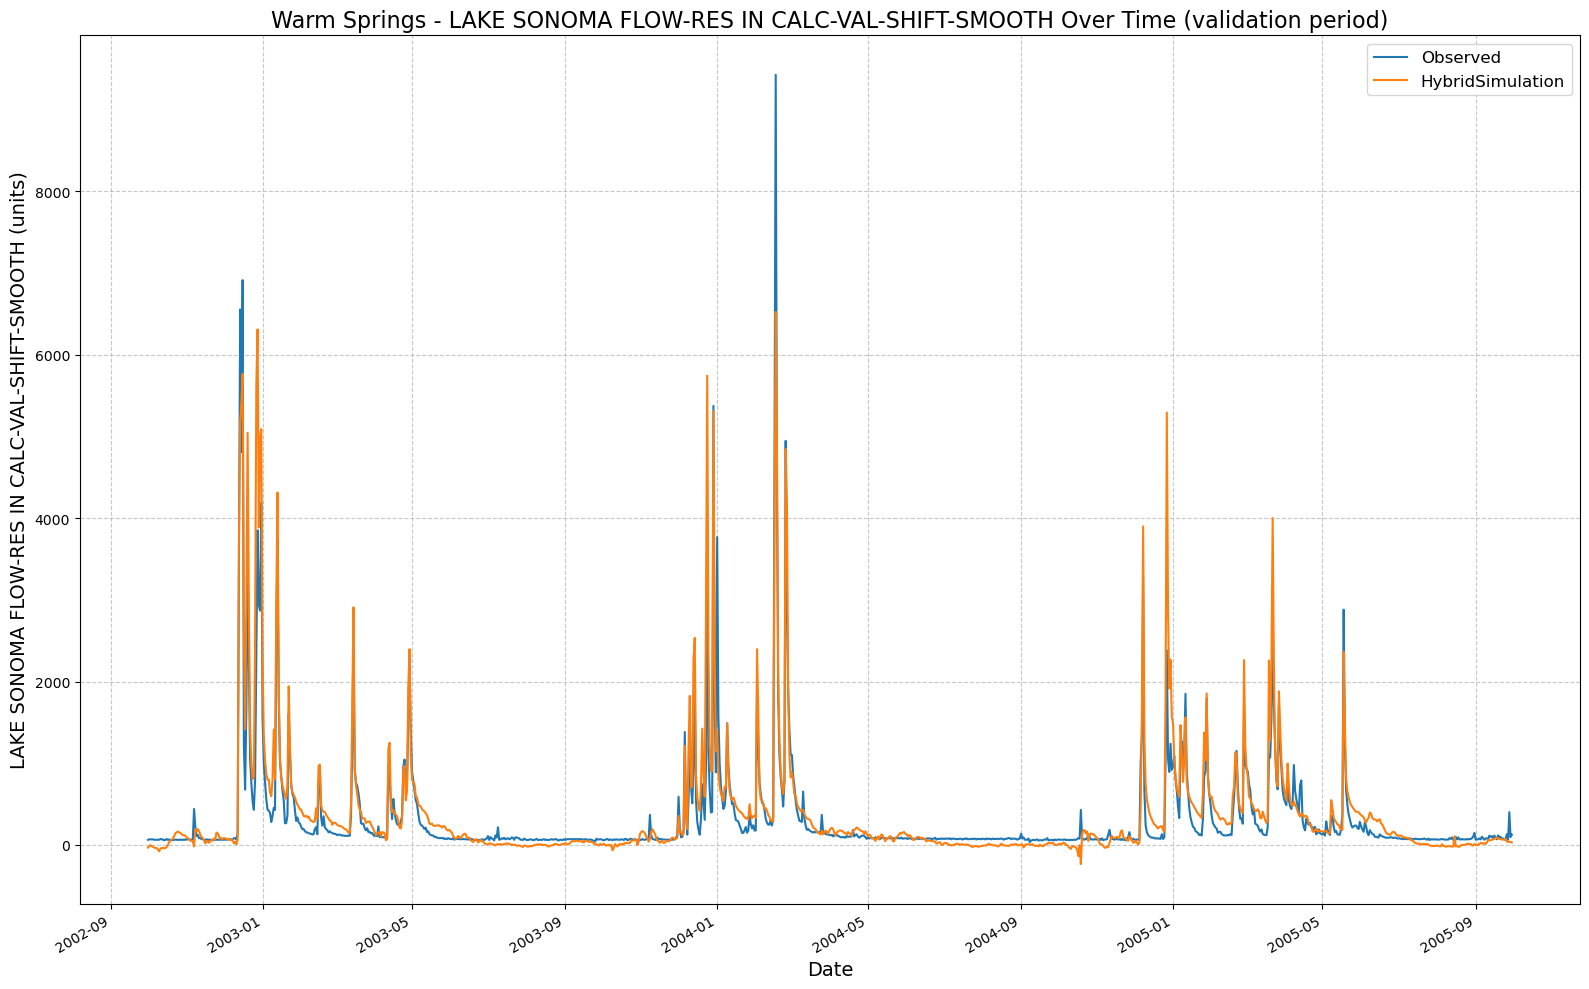

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192858\results_output_validation.csv


{'NSE': 0.8020608425140381,
 'MSE': 97048.3046875,
 'RMSE': 311.5257688980159,
 'KGE': 0.7631838556728162,
 'Alpha-NSE': 1.1347082761118474,
 'Beta-KGE': 1.1792614459991455,
 'Beta-NSE': 0.08334021226029627,
 'Pearson-r': 0.9238363568409227,
 'FHV': 13.768477737903595,
 'FMS': 57.218288453748244,
 'FLV': -1332.5399776527981,
 'Peak-Timing': 0.0,
 'Peak-MAPE': 17.569600343704224}

In [43]:
lstmPhysicsDaily.results()

test if hourly physics informed works:

In [17]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/WarmSprings_Inflow_hourly.csv")
params = {
    "epochs":5,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
lstmPhysicsHourly = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=True)

In [19]:
lstmPhysicsHourly.train()

2025-01-10 19:21:40,954: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192140\output.log initialized.
2025-01-10 19:21:40,957: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192140
2025-01-10 19:21:40,961: ### Run configurations for testing_run
2025-01-10 19:21:40,965: experiment_name: testing_run
2025-01-10 19:21:40,969: train_basin_file: warm springs
2025-01-10 19:21:40,972: validation_basin_file: warm springs
2025-01-10 19:21:40,974: test_basin_file: warm springs
2025-01-10 19:21:40,976: train_start_date: 1994-10-01 00:00:00
2025-01-10 19:21:40,977: train_end_date: 2002-09-30 00:00:00
2025-01-10 19:21:40,979: validation_start_date: 2002-10-01 00:00:00
2025-01-10 19:21:40,980: validation_end_date: 2005-09-30 00:00:00
2025-01-10 19:21:40,982: test_start_date: 2005-10-01 00:00:00
2025-01-10 19:21:40,984: test_end_date: 2009-09-30 00:00:00
2025-01-10 19:21:40,986: device: cpu
2025

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Validation: 100%|██████████| 1/1 [00:06<00:00,  6.93s/it]
2025-01-10 19:24:25,740: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192140\validation\model_epoch005\validation_metrics.csv
2025-01-10 19:24:25,746: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192140\validation\model_epoch005\validation_results.p


In [21]:
lstmPhysicsHourly.results()

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


KeyError: '1D'

TEST OF THE EXTENDED TRAINING PERIOD

In [23]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/updated_russian_river_folder/WarmSprings_Inflow_daily.csv")
params = {
    "epochs":5,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
    ]
#extend train period set to true
lstmPhysicsDailyExtended = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False, extend_train_period=True)

In [25]:
lstmPhysicsDailyExtended.train()

2025-01-10 19:27:12,631: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192712\output.log initialized.
2025-01-10 19:27:12,634: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192712
2025-01-10 19:27:12,637: ### Run configurations for testing_run
2025-01-10 19:27:12,639: experiment_name: testing_run
2025-01-10 19:27:12,641: train_basin_file: warm springs
2025-01-10 19:27:12,642: validation_basin_file: warm springs
2025-01-10 19:27:12,644: test_basin_file: warm springs
2025-01-10 19:27:12,647: train_start_date: 1994-10-01 00:00:00
2025-01-10 19:27:12,649: train_end_date: 2005-09-30 00:00:00
2025-01-10 19:27:12,651: validation_start_date: 2002-10-01 00:00:00
2025-01-10 19:27:12,653: validation_end_date: 2005-09-30 00:00:00
2025-01-10 19:27:12,656: test_start_date: 2005-10-01 00:00:00
2025-01-10 19:27:12,657: test_end_date: 2009-09-30 00:00:00
2025-01-10 19:27:12,660: device: cpu
2025

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]
2025-01-10 19:27:23,839: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192712\validation\model_epoch005\validation_metrics.csv
2025-01-10 19:27:23,842: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192712\validation\model_epoch005\validation_results.p


2025-01-10 19:27:37,358: Using the model weights from F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192712\model_epoch005.pt


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sel

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]
2025-01-10 19:27:37,969: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192712\test\model_epoch005\test_metrics.csv
2025-01-10 19:27:37,972: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192712\test\model_epoch005\test_results.p
Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Pl

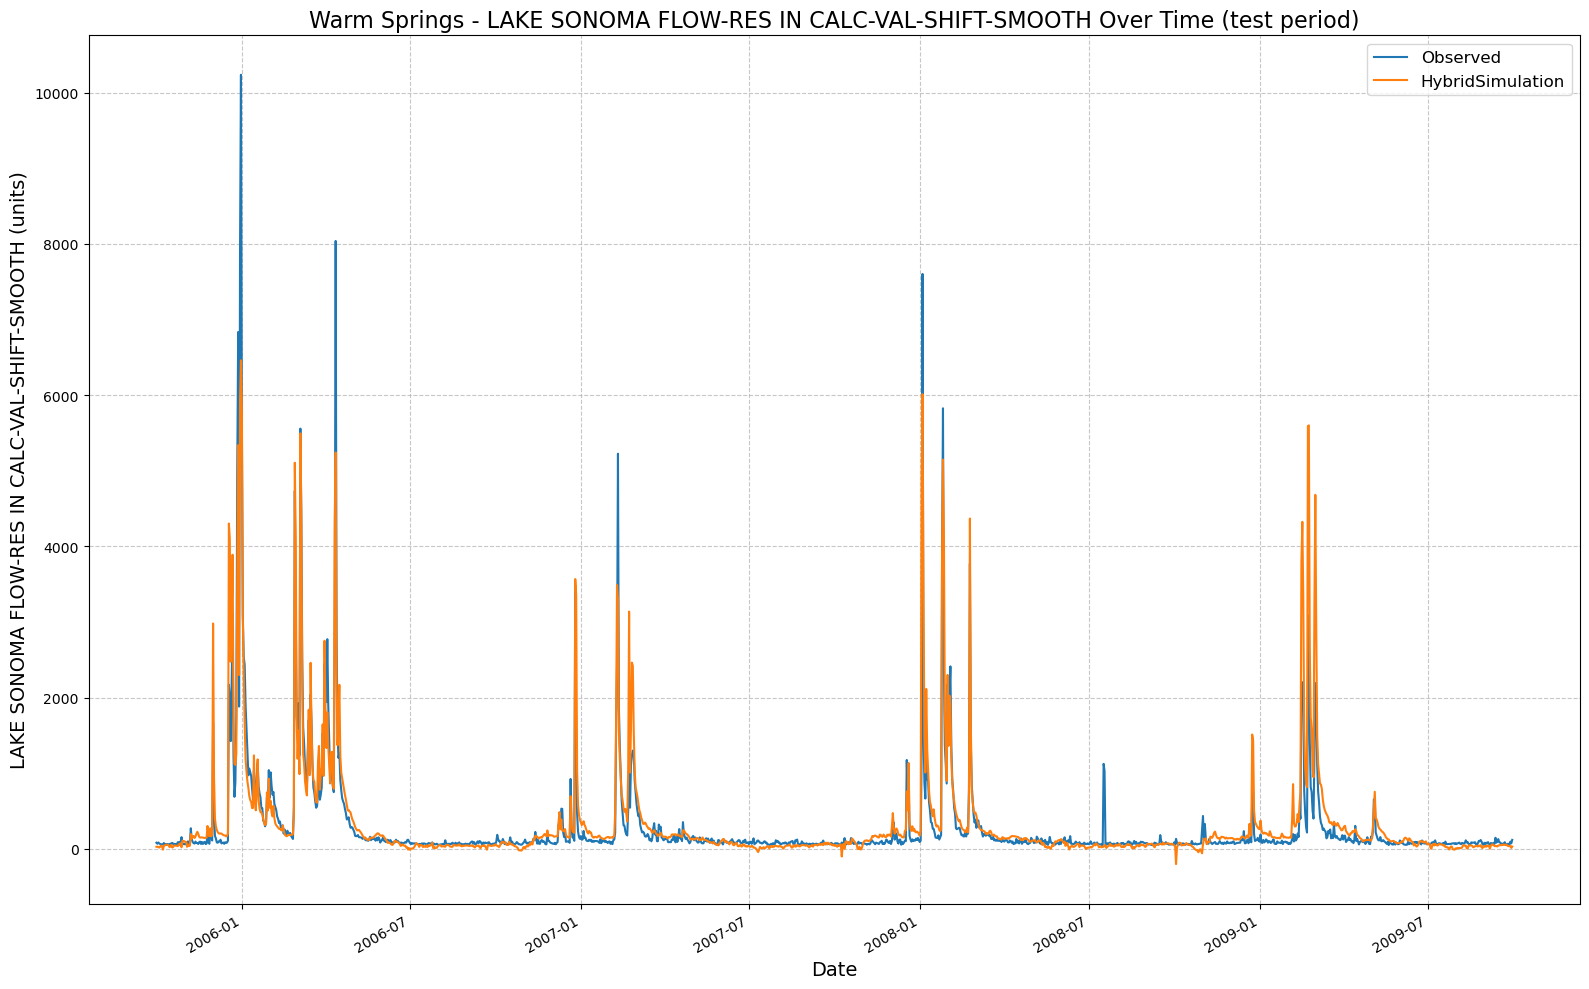

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\warm_springs_all\runs\testing_run_1001_192712\results_output_test.csv


{'NSE': 0.8044977188110352,
 'MSE': 104623.921875,
 'RMSE': 323.4562132267674,
 'KGE': 0.8314570513260003,
 'Alpha-NSE': 1.0304952635241675,
 'Beta-KGE': 1.1372857093811035,
 'Beta-NSE': 0.05583221163998562,
 'Pearson-r': 0.9071054444542348,
 'FHV': 6.421682983636856,
 'FMS': 68.398826943627,
 'FLV': -1982.8326611405523,
 'Peak-Timing': 0.3333333333333333,
 'Peak-MAPE': 51.33493741353353}

In [27]:
#NOTE Right now the extend train only alters the train period to include the validation as well, so you should use test for 
# results because evaluating on the validation period would overlap with what the model was trained on
lstmPhysicsDailyExtended.results('test')